In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


sheets =pd.read_excel('/content/Regional Sales Dataset (raw).xlsx' ,sheet_name=None)


Assign to named DataFrames

In [ ]:
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


CHANGING HEADER

In [ ]:
df_state_reg.head()

header = df_state_reg.iloc[0]
df_state_reg.columns = header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


CHECKING NULL VALUES

In [ ]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [ ]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_sales.isnull().sum()


,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


DATA CLEANING & JOINING

In [ ]:
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,8,Product 8


In [ ]:
df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,population,households,median_income,land_area,water_area,time_zone,Index,Product Name,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,27,Product 27,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,20,Product 20,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,26,Product 26,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,7,Product 7,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,8,Product 8,CT,Northeast


In [ ]:
df =df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [ ]:
df.to_csv('file.csv')

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

DELETING DUPLICATE COLUMNS

In [ ]:
duplicate_cols = ['Customer Index','id','Index','State Code_x','State Code_y','Region_y']
df=df.drop(columns=duplicate_cols,errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,population,households,median_income,land_area,water_area,time_zone,Product Name,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,Product 27,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Product 20,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,Product 26,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Product 7,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,Product 8,CT,Northeast,1085037.329


CONVERTING ALL COLUMN NAMES IN LOWER CASE

In [ ]:
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'name',
       'county', 'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'product name',
       'state code', 'region', '2017 budgets'], dtype=object)

USING ONLY NECESSARY COLUMNS FOR THE ANALYSIS


In [ ]:

cols_to_keep = [
    'ordernumber',        # unique ID
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',         # revenue (qty × unit_price)
    'total unit cost',    # company’s cost
    'state_code',
    'state',              # full state name
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

df = df[cols_to_keep]



RENAMING COLUMNS FOR BETTER UNDERSTANDING

In [ ]:
df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',
    'customer names'   : 'customer_name',
    'product name'     : 'product_name',
    'order quantity'   : 'quantity',
    'unit price'       : 'unit_price',
    'line total'       : 'revenue',
    'total unit cost'  : 'cost',
    'state_code'       : 'state',
    'state'            : 'state_name',
    'region'           : 'us_region',
    'latitude'         : 'lat',
    'longitude'        : 'lon',
    '2017 budgets'     : 'budget'
})

df.head()


,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


DOUBLE CHECKING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         64104 non-null  float64       
dtypes: datetime64[ns](1

MAKING NEW COLUMNS LIKE TOTAL COST, PROFIT MARGIN ETC. FOR BETTER ANALYSIS

In [ ]:
df['total_cost'] = df['quantity'] * df['cost']

df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

df['order_month_name'] = df['order_date'].dt.month_name()

df['order_month_num'] = df['order_date'].dt.month

df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,5685138.270,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,959899.218,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,3720639.645,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,2067108.120,20511.246,7206.654,26.0,February,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer_name      64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   quantity           64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   cost               64104 non-null  float64       
 9   state              64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  us_region          64104 non-null  object        
 12  lat                64104 non-null  float64       
 13  lon                64104 non-null  float64       
 14  budget

EDA

MONTHLY SALE TRENDS OVER EVERY YEAR

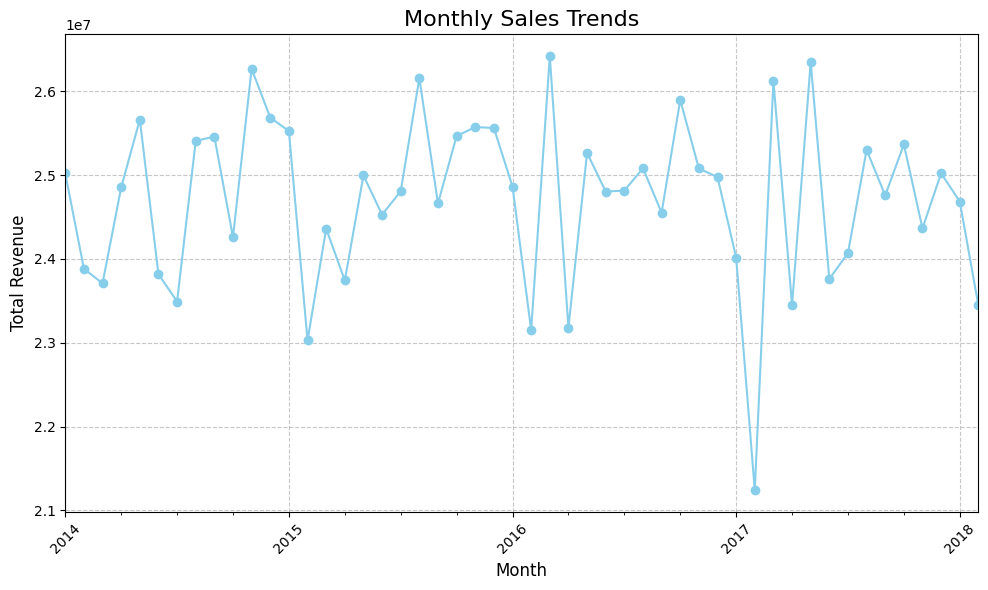

In [ ]:
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(10, 6))

# Plot the line chart
monthly_sales.plot(marker='o', linestyle='-', color='skyblue')


plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

MONTHLY SALE TRENDS IN A SINGLE YEAR

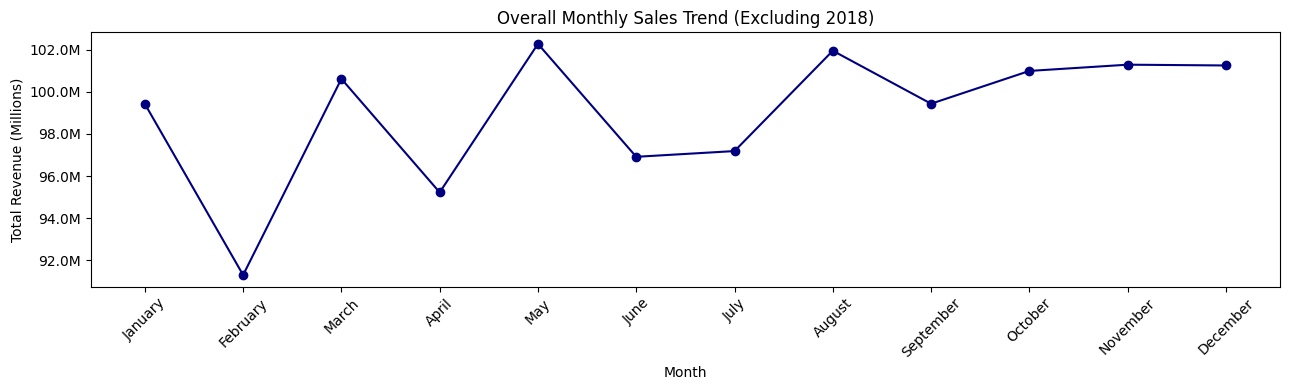

In [ ]:
#Filter by 2018 orders
df_ = df[df['order_date'].dt.year != 2018]

#Grouping month number and month name, sum revenue.
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

#Plotting
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),
    monthly_sales.values,
    marker='o',
    color='navy'
)

#Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

#dd title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

#otate x-axis labels for readability
plt.xticks(rotation=45)

#Adjust layout to prevent clipping
plt.tight_layout()

#Display the plot
plt.show()

TOP 10 PRODUCS

/tmp/ipython-input-30-2520687122.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


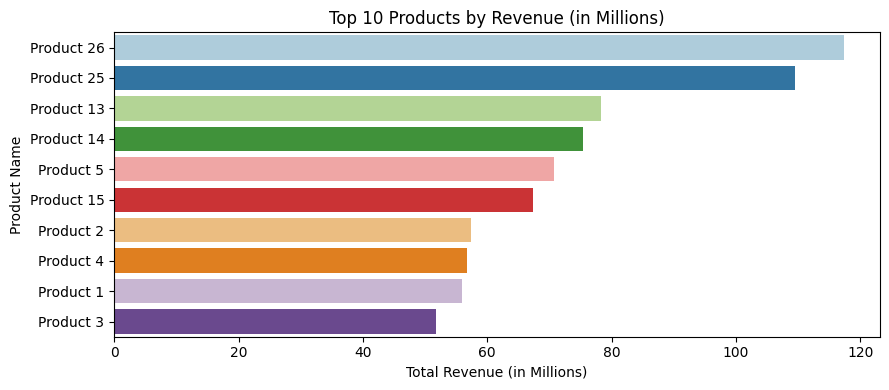

In [ ]:
# Grouping product name with revenue
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plotting horizontal bar chart
sns.barplot(
    x=top_prod.values,    # X-axis: revenue in millions
    y=top_prod.index,     # Y-axis: product names
    palette='Paired'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

SALES BY CHANNELS

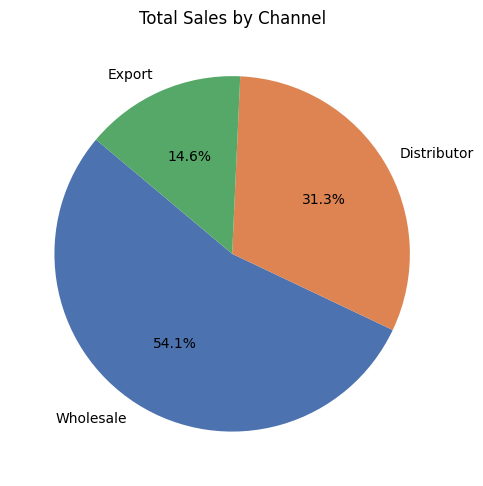

In [ ]:
# Grouping revenue by sales channel in desc
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Figure size for the pie chart
plt.figure(figsize=(5, 5))

# Ploting pie chart
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Start angle for pie chart
    colors=sns.color_palette('deep') # Color
)

# Title
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

# TOTAL REVENUE GENERATED BY DIFFERENT US REGIONS

/tmp/ipython-input-32-3854068829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='Set2')


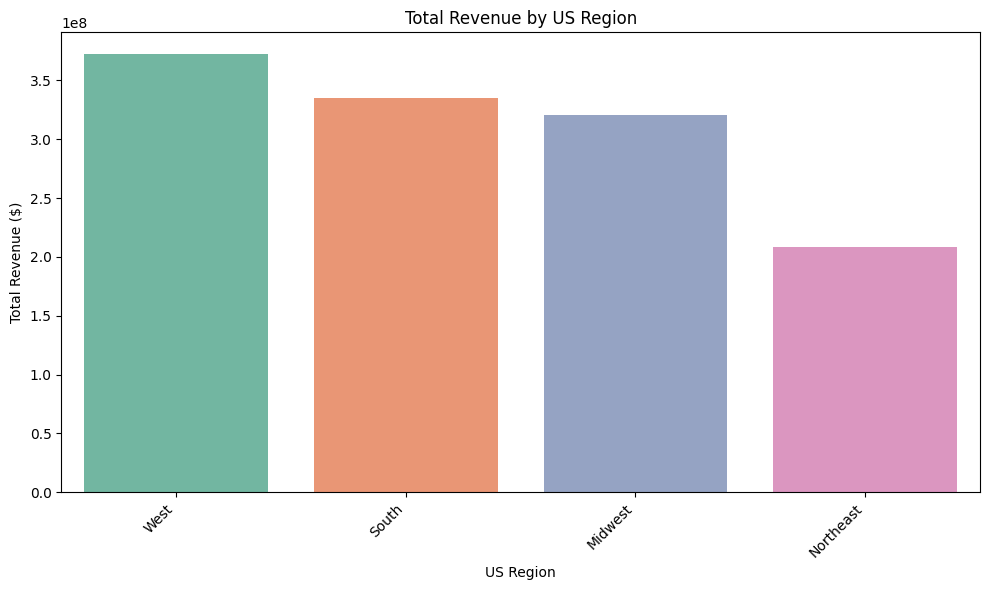

In [ ]:
# Group by 'us_region' and sum 'revenue'
revenue_by_region= df.groupby('us_region')['revenue'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='Set2')
plt.title('Total Revenue by US Region')
plt.xlabel('US Region')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('most_demanded_region_revenue_seaborn_bar_chart_corrected.png')

MARGIN PROFIT % VS UNIT PRICE

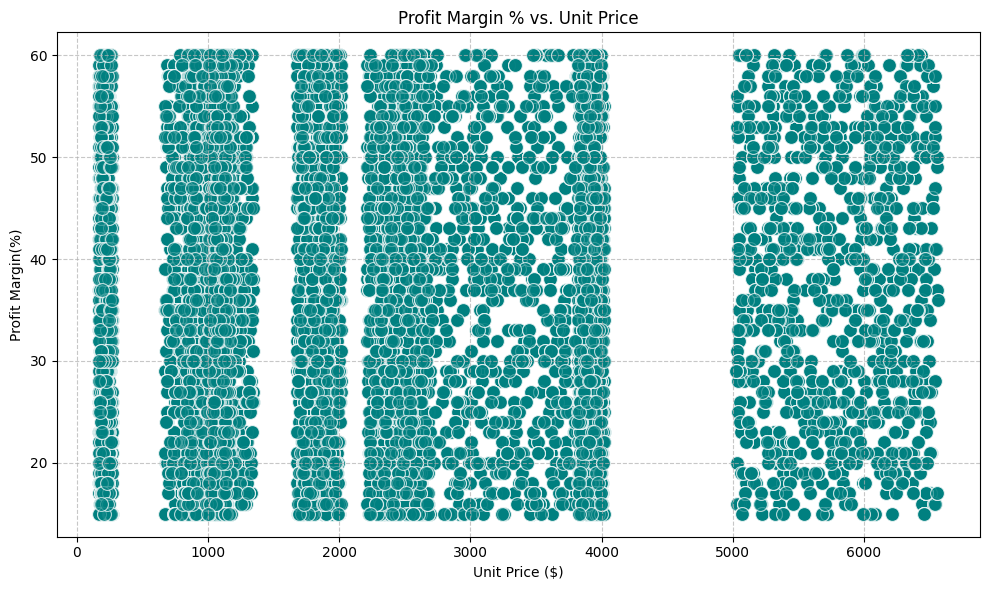

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='profit_margin_pct', data=df, s=100, color ='teal', alpha=0.7)
plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price ($)') # Xaxis
plt.ylabel('Profit Margin(%)')# Yaxis
plt.grid(True, linestyle='--', alpha=0.7) # Added grid lines for better readability of scatter plot
plt.tight_layout() # Adjust layout
plt.savefig('profit_margin_vs_unit_price_scatterplot.png')

UNIT PRICE DISTRIBUTION PER PRODUCT

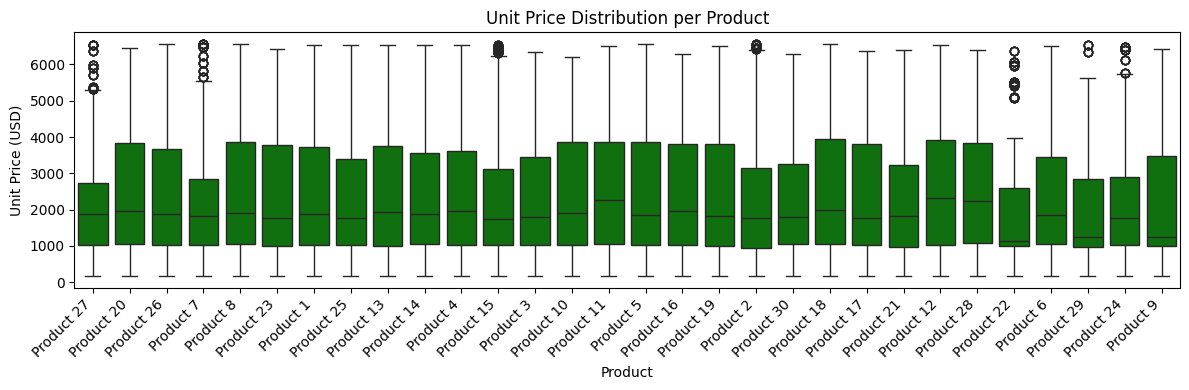

In [ ]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

TOP AND BOTTOM 10 CUSTOMERS

/tmp/ipython-input-35-2501713682.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-35-2501713682.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


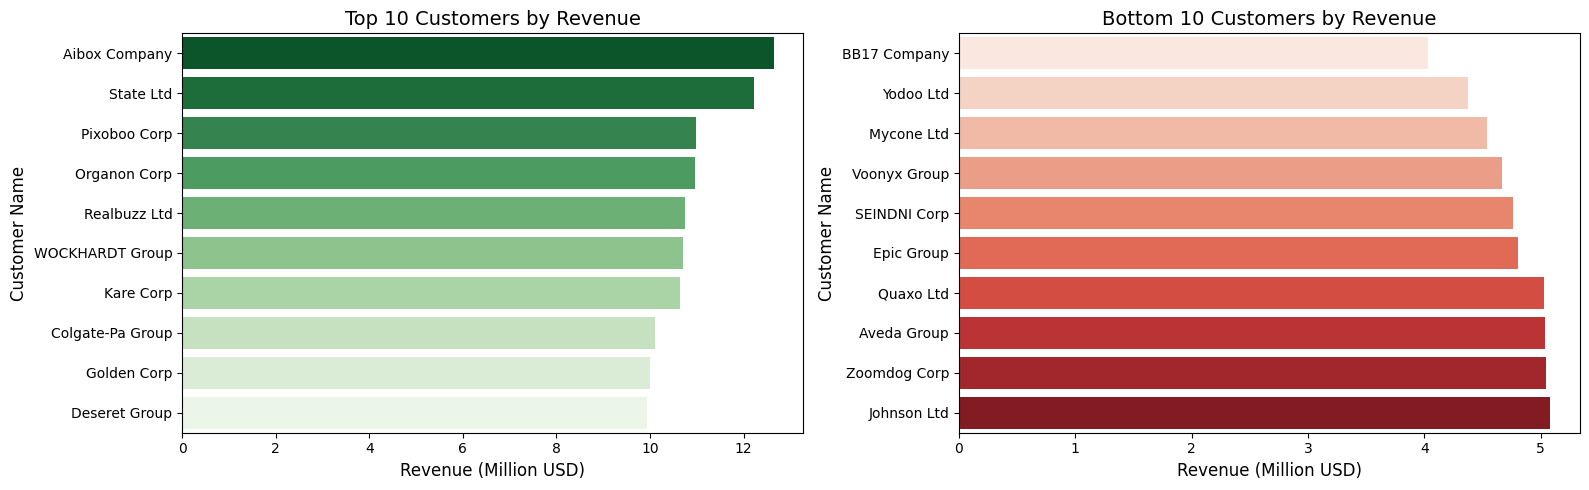

In [ ]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Greens_r',        # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)  # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)     # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)           # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)  # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)          # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                  # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

TOP 10 STATES BY REVENUE AND NO. OF ORDER

/tmp/ipython-input-36-2018115719.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


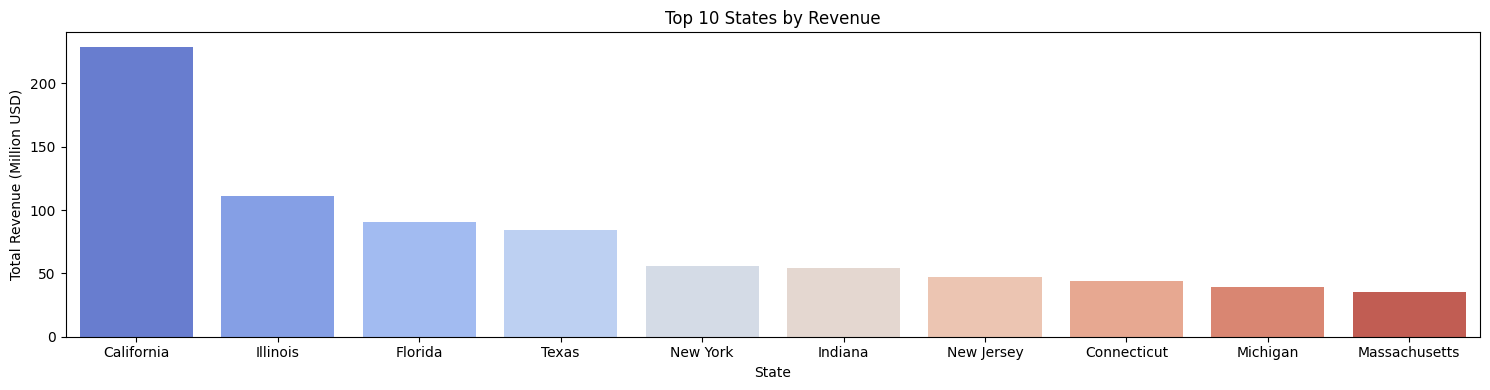

/tmp/ipython-input-36-2018115719.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


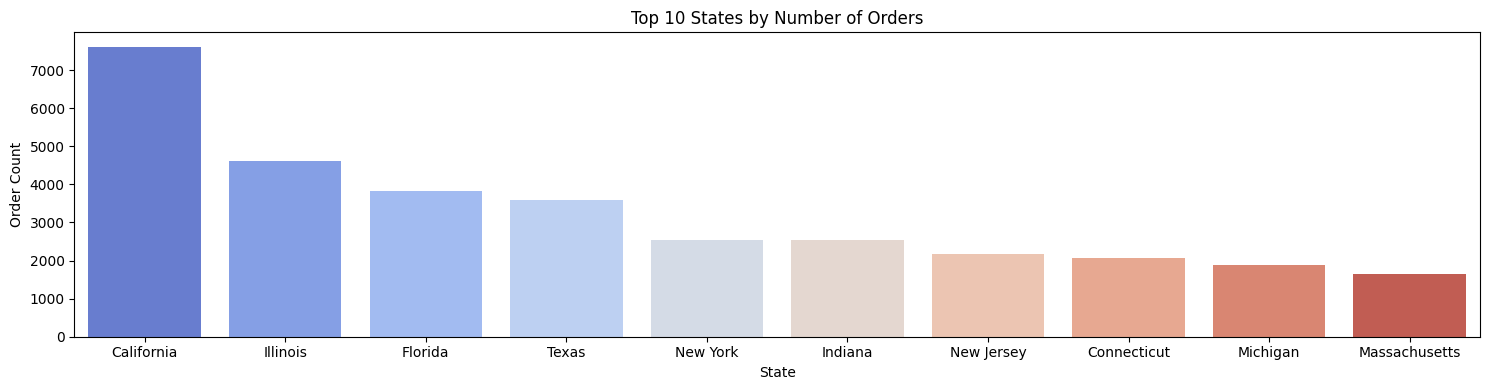

In [ ]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

EXPORTING THE FINAL DF

In [ ]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)

ValueError: No engine for filetype: 'csv'

In [ ]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,964940.231,10946.058,4048.542,27.0,January,1,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,2067108.120,13969.098,11899.602,46.0,January,1,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,5685138.270,4108.440,1760.760,30.0,January,1,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,889737.555,7201.964,9166.136,56.0,January,1,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,1085037.329,10082.160,8249.040,45.0,January,1,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Northeast,40.15511,-74.82877,5685138.270,11765.736,10022.664,46.0,February,2,2018-02
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Midwest,42.11030,-88.03424,959899.218,3474.486,1711.314,33.0,February,2,2018-02
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,South,26.24453,-80.20644,3720639.645,29133.610,14349.390,33.0,February,2,2018-02
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,Northeast,42.91002,-78.74182,2067108.120,20511.246,7206.654,26.0,February,2,2018-02
